## Exercício:

### Função 1:

* $y = x^3 + x^2 - 10x - 10, \sim x\in[-5,5]$

In [22]:
# Carregando bibliotecas numérica e gráfica
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# intervalo e numero de pontos de plotagem
x1, x2, N = -5, 5, 50 
# lista das coordenadas x
x = np.linspace(x1,x2,N)

# lista da função z = x**3 + x**2 - 10*x - 10 e suas derivadas analíticas
z  = x**3 + x**2 - 10*x - 10
dz = 3*x**2 + 2*x - 10
 
# cálculo da 1a. derivada progressiva e regressiva (erro da ordem de dx^2)
dzp = [(z[i+1]-z[i])/(x[i+1]-x[i]) for i in range(0,N-1)]

# cálculo da 1a. derivada de ponto central (erro da ordem de dx^3)
dzc = [(z[i+1]-z[i-1])/(x[i+1]-x[i-1]) for i in range(1,N-1)]

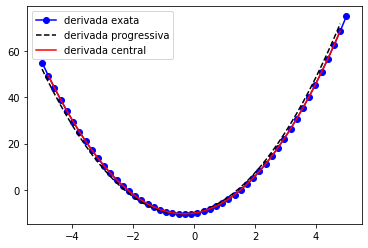

In [24]:
# gráfico: 1a. derivada
plt.plot(x,dz,'bo-',label = 'derivada exata')
plt.plot (x[0:(N-1)],dzp,'k--', label = 'derivada progressiva')
plt.plot(x[1:(N-1)],dzc,'r', label = 'derivada central')
plt.legend()
plt.show()

Observe a a diferença pequena entre os gráficos gerados pelas devidadas exata, progressiva e central.

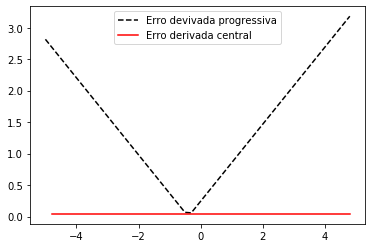

In [25]:
# cálculo do erro em cada ponto x_i, usando a função np.abs que calcula o valor absoluto do argumento
errodzp = np.abs(dzp-dz[0:(N-1)]) 
errodzc = np.abs(dzc-dz[1:(N-1)])

#Para cacular o erro integrado basta somar estes erros em cada ponto
int_errodzp = np.sum(errodzp)
int_errodzc = np.sum(errodzc)

# gráfico 1: 1a. derivada
plt.plot(x[0:(N-1)],errodzp,'k--',label='Erro devivada progressiva')
plt.plot(x[1:(N-1)],errodzc,'r',label='Erro derivada central')
plt.legend()
plt.show()
plt.show()

In [26]:
# exibição dos erros integrados
print("Espaçamento dx entre x[i] e x[i+1]: %5.3f" % (x[1]-x[0]))
print("Erro integrado na 1a. derivada progressiva: %5.3f" % int_errodzp)
print("Erro integrado na 1a. derivada de ponto central: %5.3f" % int_errodzc)

Espaçamento dx entre x[i] e x[i+1]: 0.204
Erro integrado na 1a. derivada progressiva: 75.269
Erro integrado na 1a. derivada de ponto central: 1.999


Agora o gráfico que relaciona o espaçamento entre $x_{i}$ e $x_{i+1}$ = $\Delta x$ e o erro integrado progressivo $\Delta_{p}$ e central $\Delta_{c}$ para N = 50, N = 100, N = 150

Temos os valores para os respectivos $N$: $N_{1} = 50$, $\Delta x_{1} = 0,204$, $\Delta_{p1} = 75,269$, $\Delta_{c1} = 1,999$ ; $N_{2} = 100$, $\Delta x_{2} = 0,101$, $\Delta_{p2} = 75, 296$ , $\Delta_{c2} = 1,000 $; $N_{3} = 150$, $\Delta x_{3} = 0,067$, $\Delta_{p3} = 75,310 $, $\Delta_{c3} = 0,667$  

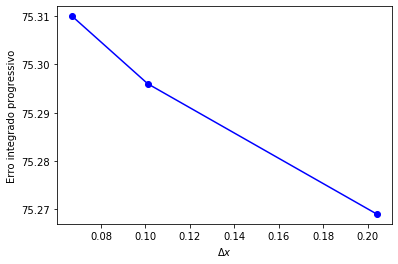

In [27]:
# gráfico erro progressivo:
deltax = [0.204,0.101,0.067]
erroprog = [75.269, 75.296, 75.310]
errocent = [1.999, 1.000, 0.667]
plt.plot(deltax,erroprog,'bo-')
plt.xlabel('$\Delta x$')
plt.ylabel('Erro integrado progressivo')
plt.show()

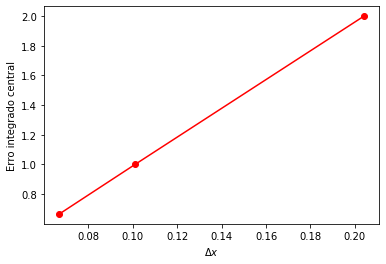

In [28]:
# gráfico erro central:

plt.plot(deltax,errocent,'ro-')
plt.xlabel('$\Delta x$')
plt.ylabel('Erro integrado central')
plt.show()

Perceba que o erro integrado progressivo aumenta conforme o número de divisões do intervalo aumenta, ocorre o contrário no caso do erro progressivo central.

### Calculo da integral 1:

In [29]:
# Definição da função a ser integrada
def f(x):
    return x**3 + x**2 - 10*x - 10

# Função que calcula a integral exata:
def calc_integral(a, b):
    calc_integral = ((b**4)/4) + ((b**3)/3) - 5*(b**2) - 10*b - ((a**4)/4) - ((a**3)/3) + 5*(a**2) + 10*a 
    return calc_integral
# Função que realiza a integração numérica:
def integral(x,z):
    # Determina o número N de pontos
    N = len(x)
    
    # Calculo de dx
    dx = x[1]-x[0]
    
    # Calculo de área abaixo de curvas
    ts = 0
    for i in range(0,N-1):
        
            ts = ts + (z[i]+z[i+1])*dx/2
            
    
    return ts

In [30]:
# Define intervalo e número de pontos de plotagem
x1, x2 = -5, 5

# calculo exato da integral
int_exata = calc_integral(x1,x2)

for i in [50,100,150]:
    
    print('')
    print('N = %d' % i)
        
    x = np.linspace(x1,x2,i)
    z = f(x)
    int_num = integral(x,z)
    erro = np.abs(int_num-int_exata)
        
    print( 'Integral = %5.3f, Erro = %5.3f' % (int_num,erro))
    


N = 50
Integral = -16.597, Erro = 0.069

N = 100
Integral = -16.650, Erro = 0.017

N = 150
Integral = -16.659, Erro = 0.008


Para os valores de $N$ e erro acima construiremos o gráfico

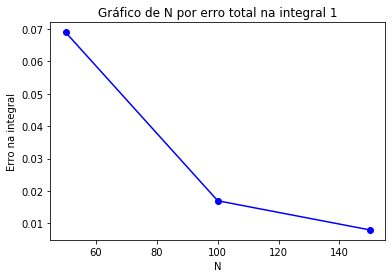

In [31]:
# Gráfico de erro na integral
valorN = [50, 100, 150]
erro_integ = [0.069,0.017,0.008]
plt.plot(valorN,erro_integ,'bo-')
plt.title('Gráfico de N por erro total na integral 1')
plt.xlabel('N')
plt.ylabel('Erro na integral')
plt.show()

### Função 2:

* $y = \frac{sinx}{x}, \sim x\in[-50,50]$

In [32]:
# intervalo e numero de pontos de plotagem
x1, x2, N = -50, 50, 100 
# lista das coordenadas x
x = np.linspace(x1,x2,N)

# lista da função z = x**3 + x**2 - 10*x - 10 e suas derivadas analíticas
z  = (np.sin(x)/x)
dz = (np.cos(x)/x) - (np.sin(x)/(x**2))
 
# cálculo da 1a. derivada progressiva e regressiva (erro da ordem de dx^2)
dzp = [(z[i+1]-z[i])/(x[i+1]-x[i]) for i in range(0,N-1)]

# cálculo da 1a. derivada de ponto central (erro da ordem de dx^3)
dzc = [(z[i+1]-z[i-1])/(x[i+1]-x[i-1]) for i in range(1,N-1)]

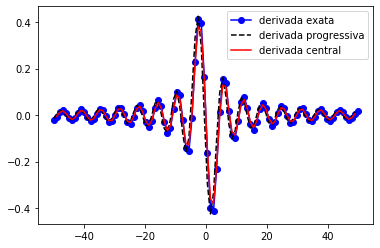

In [33]:
# gráfico: 1a. derivada
plt.plot(x,dz,'bo-',label = 'derivada exata')
plt.plot (x[0:(N-1)],dzp,'k--', label = 'derivada progressiva')
plt.plot(x[1:(N-1)],dzc,'r', label = 'derivada central')
plt.legend()
plt.show()

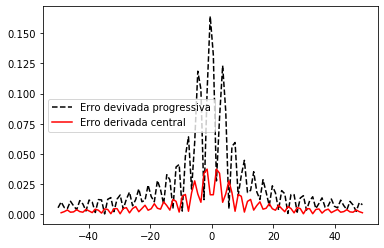

In [34]:
# cálculo do erro em cada ponto x_i, usando a função np.abs que calcula o valor absoluto do argumento
errodzp = np.abs(dzp-dz[0:(N-1)]) 
errodzc = np.abs(dzc-dz[1:(N-1)])

#Para cacular o erro integrado basta somar estes erros em cada ponto
int_errodzp = np.sum(errodzp)
int_errodzc = np.sum(errodzc)

# gráfico 1: 1a. derivada
plt.plot(x[0:(N-1)],errodzp,'k--',label='Erro devivada progressiva')
plt.plot(x[1:(N-1)],errodzc,'r',label='Erro derivada central')
plt.legend()
plt.show()

In [35]:
# exibição dos erros integrados
print("Espaçamento dx entre x[i] e x[i+1]: %5.3f" % (x[1]-x[0]))
print("Erro integrado na 1a. derivada progressiva: %5.3f" % int_errodzp)
print("Erro integrado na 1a. derivada de ponto central: %5.3f" % int_errodzc)

Espaçamento dx entre x[i] e x[i+1]: 1.010
Erro integrado na 1a. derivada progressiva: 2.328
Erro integrado na 1a. derivada de ponto central: 0.700


Temos os valores para os respectivos $N$: $N_{1} = 50$, $\Delta x_{1} = 2,041$, $\Delta_{p1} = 2,145$, $\Delta_{c1} = 1,274$ ; $N_{2} = 100$, $\Delta x_{2} = 1,010$, $\Delta_{p2} = 2,328$ , $\Delta_{c2} = 0,700 $; $N_{3} = 150$, $\Delta x_{3} = 0,671$, $\Delta_{p3} = 2,365 $, $\Delta_{c3} = 0,476$  

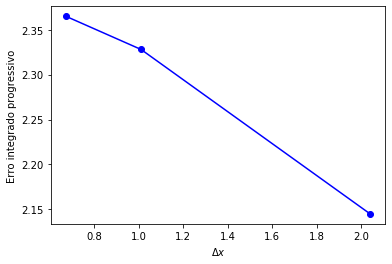

In [36]:
# gráfico erro progressivo:
deltax = [2.041,1.010,0.671]
erroprog = [2.145, 2.328, 2.365]
errocent = [1.274,0.700, 0.476]
plt.plot(deltax,erroprog,'bo-')
plt.xlabel('$\Delta x$')
plt.ylabel('Erro integrado progressivo')
plt.show()

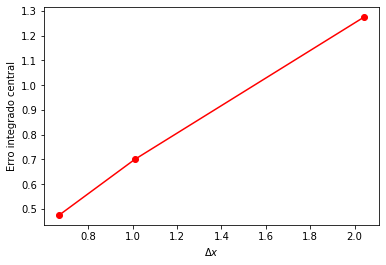

In [37]:
# gráfico erro central:
plt.plot(deltax,errocent,'ro-')
plt.xlabel('$\Delta x$')
plt.ylabel('Erro integrado central')
plt.show()

Perceba que novamente o erro integrado progressivo aumenta conforme o número de divisões do intervalo aumenta, ocorre o contrário no caso do erro progressivo central.

#### Calculo da Integral 2:

In [38]:
# Definição da função a ser integrada
def f(x):
    return (np.sin(x)/x)

# Função que realiza a integração numérica:
def integral(x,z):
    # Determina o número N de pontos
    N = len(x)
    
    # Calculo de dx
    dx = x[1]-x[0]
    
    # Calculo de área abaixo de curvas
    ts = 0
    for i in range(0,N-1):
        
            ts = ts + (z[i]+z[i+1])*dx/2
            
    
    return ts

In [39]:
# Define intervalo e número de pontos de plotagem
x1, x2 = -50, 50

# calculo exato da integral
int_exata = 3.10323

for i in [50,100,150]:
    
    print('')
    print('N = %d' % i)
        
    x = np.linspace(x1,x2,i)
    z = f(x)
    int_num = integral(x,z)
    erro = np.abs(int_num-int_exata)
        
    print( 'Integral = %5.3f, Erro = %5.3f' % (int_num,erro))
    


N = 50
Integral = 3.118, Erro = 0.015

N = 100
Integral = 3.107, Erro = 0.003

N = 150
Integral = 3.105, Erro = 0.001


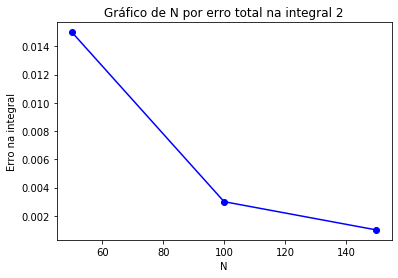

In [40]:
# Gráfico de erro na integral
valorN = [50, 100, 150]
erro_integ = [0.015,0.003,0.001]
plt.plot(valorN,erro_integ,'bo-')
plt.title('Gráfico de N por erro total na integral 2')
plt.xlabel('N')
plt.ylabel('Erro na integral')
plt.show()

### Função 3:

* $y = e^{-ax}sinx, \sim x\in[0,10], a \in[0.5,1.0,2.0]$

In [41]:
# intervalo e numero de pontos de plotagem
x1, x2, a, N = 0, 10, 0.5, 50 
# lista das coordenadas x
x = np.linspace(x1,x2,N)

# lista da função z = np.exp(-a*x)*np.sin(x)e suas derivadas analíticas
z  = np.exp(-a*x)*np.sin(x)
dz = -a*np.exp(-a*x)*np.sin(x) + np.exp(-a*x)*np.cos(x)
 
# cálculo da 1a. derivada progressiva e regressiva (erro da ordem de dx^2)
dzp = [(z[i+1]-z[i])/(x[i+1]-x[i]) for i in range(0,N-1)]

# cálculo da 1a. derivada de ponto central (erro da ordem de dx^3)
dzc = [(z[i+1]-z[i-1])/(x[i+1]-x[i-1]) for i in range(1,N-1)]

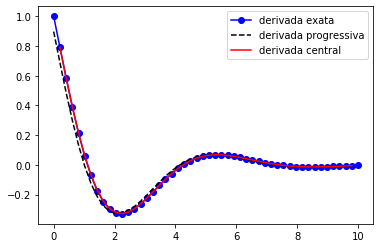

In [42]:
# gráfico: 1a. derivada
plt.plot(x,dz,'bo-',label = 'derivada exata')
plt.plot (x[0:(N-1)],dzp,'k--', label = 'derivada progressiva')
plt.plot(x[1:(N-1)],dzc,'r', label = 'derivada central')
plt.legend()
plt.show()

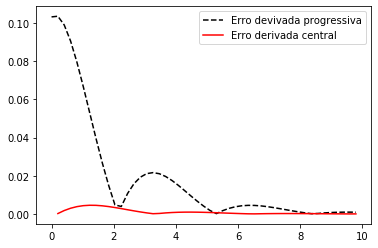

In [43]:
# cálculo do erro em cada ponto x_i, usando a função np.abs que calcula o valor absoluto do argumento
errodzp = np.abs(dzp-dz[0:(N-1)]) 
errodzc = np.abs(dzc-dz[1:(N-1)])

#Para cacular o erro integrado basta somar estes erros em cada ponto
int_errodzp = np.sum(errodzp)
int_errodzc = np.sum(errodzc)

# gráfico 1: 1a. derivada
plt.plot(x[0:(N-1)],errodzp,'k--',label='Erro devivada progressiva')
plt.plot(x[1:(N-1)],errodzc,'r',label='Erro derivada central')
plt.legend()
plt.show()
plt.show()

In [44]:
# exibição dos erros integrados
print("Espaçamento dx entre x[i] e x[i+1]: %5.3f" % (x[1]-x[0]))
print("Erro integrado na 1a. derivada progressiva: %5.3f" % int_errodzp)
print("Erro integrado na 1a. derivada de ponto central: %5.3f" % int_errodzc)

Espaçamento dx entre x[i] e x[i+1]: 0.204
Erro integrado na 1a. derivada progressiva: 0.928
Erro integrado na 1a. derivada de ponto central: 0.052


Temos os valores para os respectivos $N$: $N_{1} = 50$, $\Delta x_{1} = 2,041$, $\Delta_{p1} = 0,928$, $\Delta_{c1} = 0,052$ ; $N_{2} = 100$, $\Delta x_{2} = 1,010$, $\Delta_{p2} = 0,920$ , $\Delta_{c2} = 0,026 $; $N_{3} = 150$, $\Delta x_{3} = 0,067$, $\Delta_{p3} = 0,917 $, $\Delta_{c3} = 0,017$  

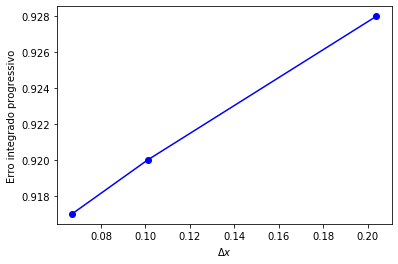

In [45]:
# gráfico erro progressivo:
deltax = [0.204,0.101,0.067]
erroprog = [0.928, 0.920, 0.917]
errocent = [0.052,0.026,0.017]
plt.xlabel('$\Delta x$')
plt.ylabel('Erro integrado progressivo')
plt.plot(deltax,erroprog,'bo-')
plt.show()

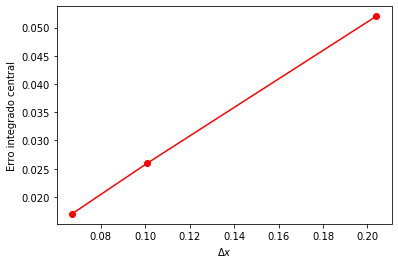

In [46]:
# gráfico erro central:
plt.plot(deltax,errocent,'ro-')
plt.xlabel('$\Delta x$')
plt.ylabel('Erro integrado central')
plt.show()

#### Calculo da Integral 3:

In [47]:
# Definição da função a ser integrada
def f(x):
    return np.exp(-a*x)*np.sin(x)

# Função que calcula a integral exata:
def calc_integral(c, d):
    calc_integral = (-np.exp(-d*a)*np.cos(d) - np.exp(-d*a)*a*np.sin(d) + np.exp(-c*a)*np.cos(c) + np.exp(-c*a)*a*np.sin(c))/(1 + a**2)
    return calc_integral
# Função que realiza a integração numérica:
def integral(x,z):
    # Determina o número N de pontos
    N = len(x)
    
    # Calculo de dx
    dx = x[1]-x[0]
    
    # Calculo de área abaixo de curvas
    ts = 0
    for i in range(0,N-1):
        
            ts = ts + (z[i]+z[i+1])*dx/2
            
    
    return ts

In [48]:
# Define intervalo e número de pontos de plotagem
x1, x2 = 0, 10

# calculo exato da integral
int_exata = calc_integral(x1,x2)

for i in [50,100,150]:
    
    print('')
    print('N = %d' % i)
        
    x = np.linspace(x1,x2,i)
    z = f(x)
    int_num = integral(x,z)
    erro = np.abs(int_num-int_exata)
        
    print( 'Integral = %5.3f, Erro = %5.4f' % (int_num,erro))



N = 50
Integral = 0.803, Erro = 0.0035

N = 100
Integral = 0.805, Erro = 0.0009

N = 150
Integral = 0.806, Erro = 0.0004


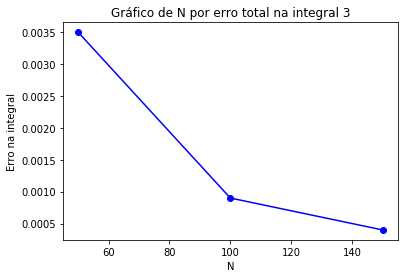

In [49]:
# Gráfico de erro na integral
valorN = [50, 100, 150]
erro_integ = [0.0035,0.0009,0.0004]
plt.plot(valorN,erro_integ,'bo-')
plt.title('Gráfico de N por erro total na integral 3')
plt.xlabel('N')
plt.ylabel('Erro na integral')
plt.show()